<img 
    style="position: absolute; 
           left: 60%; 
           top: 0; /* Added to ensure proper positioning */
           height: 900px; 
           width: 40%; /* Maintain the original width */
           object-fit: cover; /* Adjust if necessary */
           clip-path: inset(0px 50px 0px 50px round 10px);" 
    src= "public_html\_data\fig\buildingdamage.svg"
/>
</figure>


<h1 style="width: 60%; color: #EC6842; font-size: 55pt;">
    <Strong>
        IJsselsteinseweg 77
    </Strong>
</h1>

<h2 id="Background"><B>
    Rationale for the project<a class="anchor-link" href="#Background">&#182;</a>
    </B>
</h2>
<p style="text-align: justify; width: 60%; font-weight: normal;">
     This studies case study is the building IJsselsteinseweg 77 in Nieuwegein in the Netherlands, a deatched 2-layer unreinforced masonry structure from 1961 with 2 floors and a cellar which was eventually demolished circa 2015. We can evaluate the state of damage before its demolishing due to a Foundation research report that was commissioned by the owner to Sandra Lobbe Ispectie & Advies, a building consulting firm who carried out the building and foundation investigation on June 2019 and thereafter produced a report documenting the buildings measurements, characteristics, damage state and their own assessment on the necessary course of action or risk of the building integrity due to subsidence effects. The main assessment found that the current capacity provided by the building’s foundation was Insufficient and given the experienced deformations by the building and the damage state of the building, countermeasures should be implemented in a period of 1-5 years following the assessment date. 
</p>

## <strong> X | Imports</strong>

In [1]:
from analytical import house, LTSM, EM
from analytical.assessment.tools.plots import EM_plot, LTSM_plot, subsurface

import numpy as np

## <strong> 0 | Instantiate `HOUSE` object</strong>

### <strong> 0.1 | Structure dimensions and measurements</strong>

In [2]:
walls = {
    'Wall 1':{"x": np.array([0, 0, 0]), "y": np.array([0, 3.5, 7]), "z": np.array([0, -72, -152]), 'phi': np.array([1/200,1/200]), 'height': 5250, 'thickness': 27,'area': 34.25,'area': 34.25, 'opening': 4.86},
    'Wall 2':{"x": np.array([0, 4.5, 8.9]), "y": np.array([7, 7, 7]), "z": np.array([-152, -163, -188]),  'phi': np.array([1/33,1/50]), 'height': 5250, 'thickness': 27,'area': 37,'opening': 9.36},
    'Wall 3':{"x": np.array([8.9, 8.9]), "y": np.array([3.6, 7]), "z": np.array([-149, -188]), 'phi': np.array([0,0]), 'height': 5250, 'thickness': 27,'area': 24.35, 'opening': 4.98},
    'Wall 4':{"x": np.array([8.9, 10.8]), "y": np.array([3.6, 3.6]), "z": np.array([-149,-138]), 'phi': np.array([0,0]), 'height': 2850, 'thickness': 27,'area': 8.09, 'opening': 1.68},
    'Wall 5':{"x": np.array([10.8, 10.8]), "y": np.array([0, 3.6]), "z": np.array([-104, -138]), 'phi': np.array([0,0]), 'height': 2850, 'thickness': 27,'area': 9.15, 'opening': 1},
    'Wall 6':{"x": np.array([0, 5.2, 6.4, 8.9, 10.8]), "y": np.array([0, 0, 0, 0, 0]), "z": np.array([0, -42, -55, -75, -104]), 'phi': np.array([1/100,1/100]), 'height': 5000, 'thickness': 27, 'area': 47.58, 'opening': 4.42},
}

damage =  {'crack_1' : {'wall_id' : 'Wall 2','c_w': 4,'c_l': 890,},
           'crack_2' : {'wall_id' : 'Wall 1','c_w': 2,'c_l': 1670,},
           'crack_3' : {'wall_id' : 'Wall 2','c_w': 3,'c_l': 1868,},
           'crack_5' : {'wall_id' : 'Wall 2','c_w': 3,'c_l': 1760,},
           'crack_6' : {'wall_id' : 'Wall 2','c_w': 3,'c_l': 1200,},
           'crack_7' : {'wall_id' : 'Wall 2','c_w': 2,'c_l': 600,},
           'crack_9' : {'wall_id' : 'Wall 2','c_w': 2,'c_l': 994,},
           'crack_10': {'wall_id' : 'Wall 2','c_w': 2,'c_l': 980,}}

ijsselsteinseweg = house(measurements = walls)
ijsselsteinseweg.state = damage

### <strong> 0.2 | Estimating the displacement surface & greenfield profile</strong>

In [3]:
ijsselsteinseweg.interpolate() # Interpolate subsidence shape
ijsselsteinseweg.fit_function(i_guess = 1, tolerance = 1e-2, step = 1) # Fit gaussian shapes to walls

params = ijsselsteinseweg.soil['house'].values()
app = subsurface(ijsselsteinseweg, *params)
app.run_server(port=8050, debug=False)

## <strong> 1 | Assessing the damage of the building</strong>

In [4]:
from analytical.assessment.damage_parameter import compute_damage_parameter
dam = compute_damage_parameter(damage, object = ijsselsteinseweg)

### <strong> 1.1 | Assesment through Empirical Methods </strong>

In [5]:
ijsselsteinseweg.SRI(tolerance= 0.01) #Compute the SRI parameters
report = EM(ijsselsteinseweg.soil['sri'])

app = EM_plot(report)
app.run_server(port=8051, debug=False)

### <strong> 1.2 | Assesment through the LTSM </strong>

Include further assumptions as conditions
2. TILT VERIFICATION??
3. Height in sagging zone NA assumed to be at t= H/2 where as for hogging we assume the NA to be at the lower edge therfore t=H 
2. IDEA: Define as function determine potential maximum strain values and calibrate E/G ratio

In [6]:
limit_line = -1
LTSM(ijsselsteinseweg, limit_line, methods = ['greenfield','measurements'])

app = LTSM_plot(ijsselsteinseweg)    
app.run_server(port=8052, debug=True, dev_tools_ui=False)

In [7]:
report1 = ijsselsteinseweg.assessment['ltsm']['greenfield']['report']
report2 = ijsselsteinseweg.assessment['ltsm']['measurements']['report']

app = EM_plot(report2)
app.run_server(port=8054, debug=False)

### <strong> Y | Proces save data </strong>


In [8]:
dicts = [ijsselsteinseweg.soil['sri'],
         ijsselsteinseweg.process['params'],
         ijsselsteinseweg.assessment['ltsm']['greenfield']['results'],
         ijsselsteinseweg.assessment['ltsm']['measurements']['results'],
         ijsselsteinseweg.soil['shape']]
names = ['sri','gf_params','LTSM-GF','LTSM-MS', 'MS-VAR']
ijsselsteinseweg.process_dfs(dicts, names)

In [9]:
drop_1 = ['lh_s','dl_s','lh_h','dl_h']
drop_2 = ['e_bh', 'e_bs','e_h','e_sh','e_ss','lh_s','lh_h','dl_s','dl_h']

df1 = ijsselsteinseweg.dataframes['LTSM-MS']
df1 = df1.drop(drop_1, axis = 1)

df2 = ijsselsteinseweg.dataframes['LTSM-MS']
df2 = df2.drop(drop_2, axis=1)

In [10]:
import pandas as pd

with pd.ExcelWriter('output.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')

# No need to explicitly save, as `with` context will handle that.

## <strong> 2 | A study into the preliminary assessment methods</strong>

### <strong> 1.1 |Empirical Methods assessment </strong>

In [11]:
from analytical.assessment.damage_parameter import compute_damage_parameter
from analytical.assessment.tools.utils import prepare_report

In [12]:
damage = compute_damage_parameter(ijsselsteinseweg.state, ijsselsteinseweg)

In [13]:
analysis = {}
total = None
for wall in ijsselsteinseweg.house:
    analysis[wall] = {}
    var = list(report[wall].keys())
    DL = damage['psi_wall'][wall]['DL']

    data_matrix, wall_param_labels, sources, description_annotations = prepare_report(report, wall)
    var = data_matrix - DL
    total += abs(var)

total /= len(ijsselsteinseweg.house)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

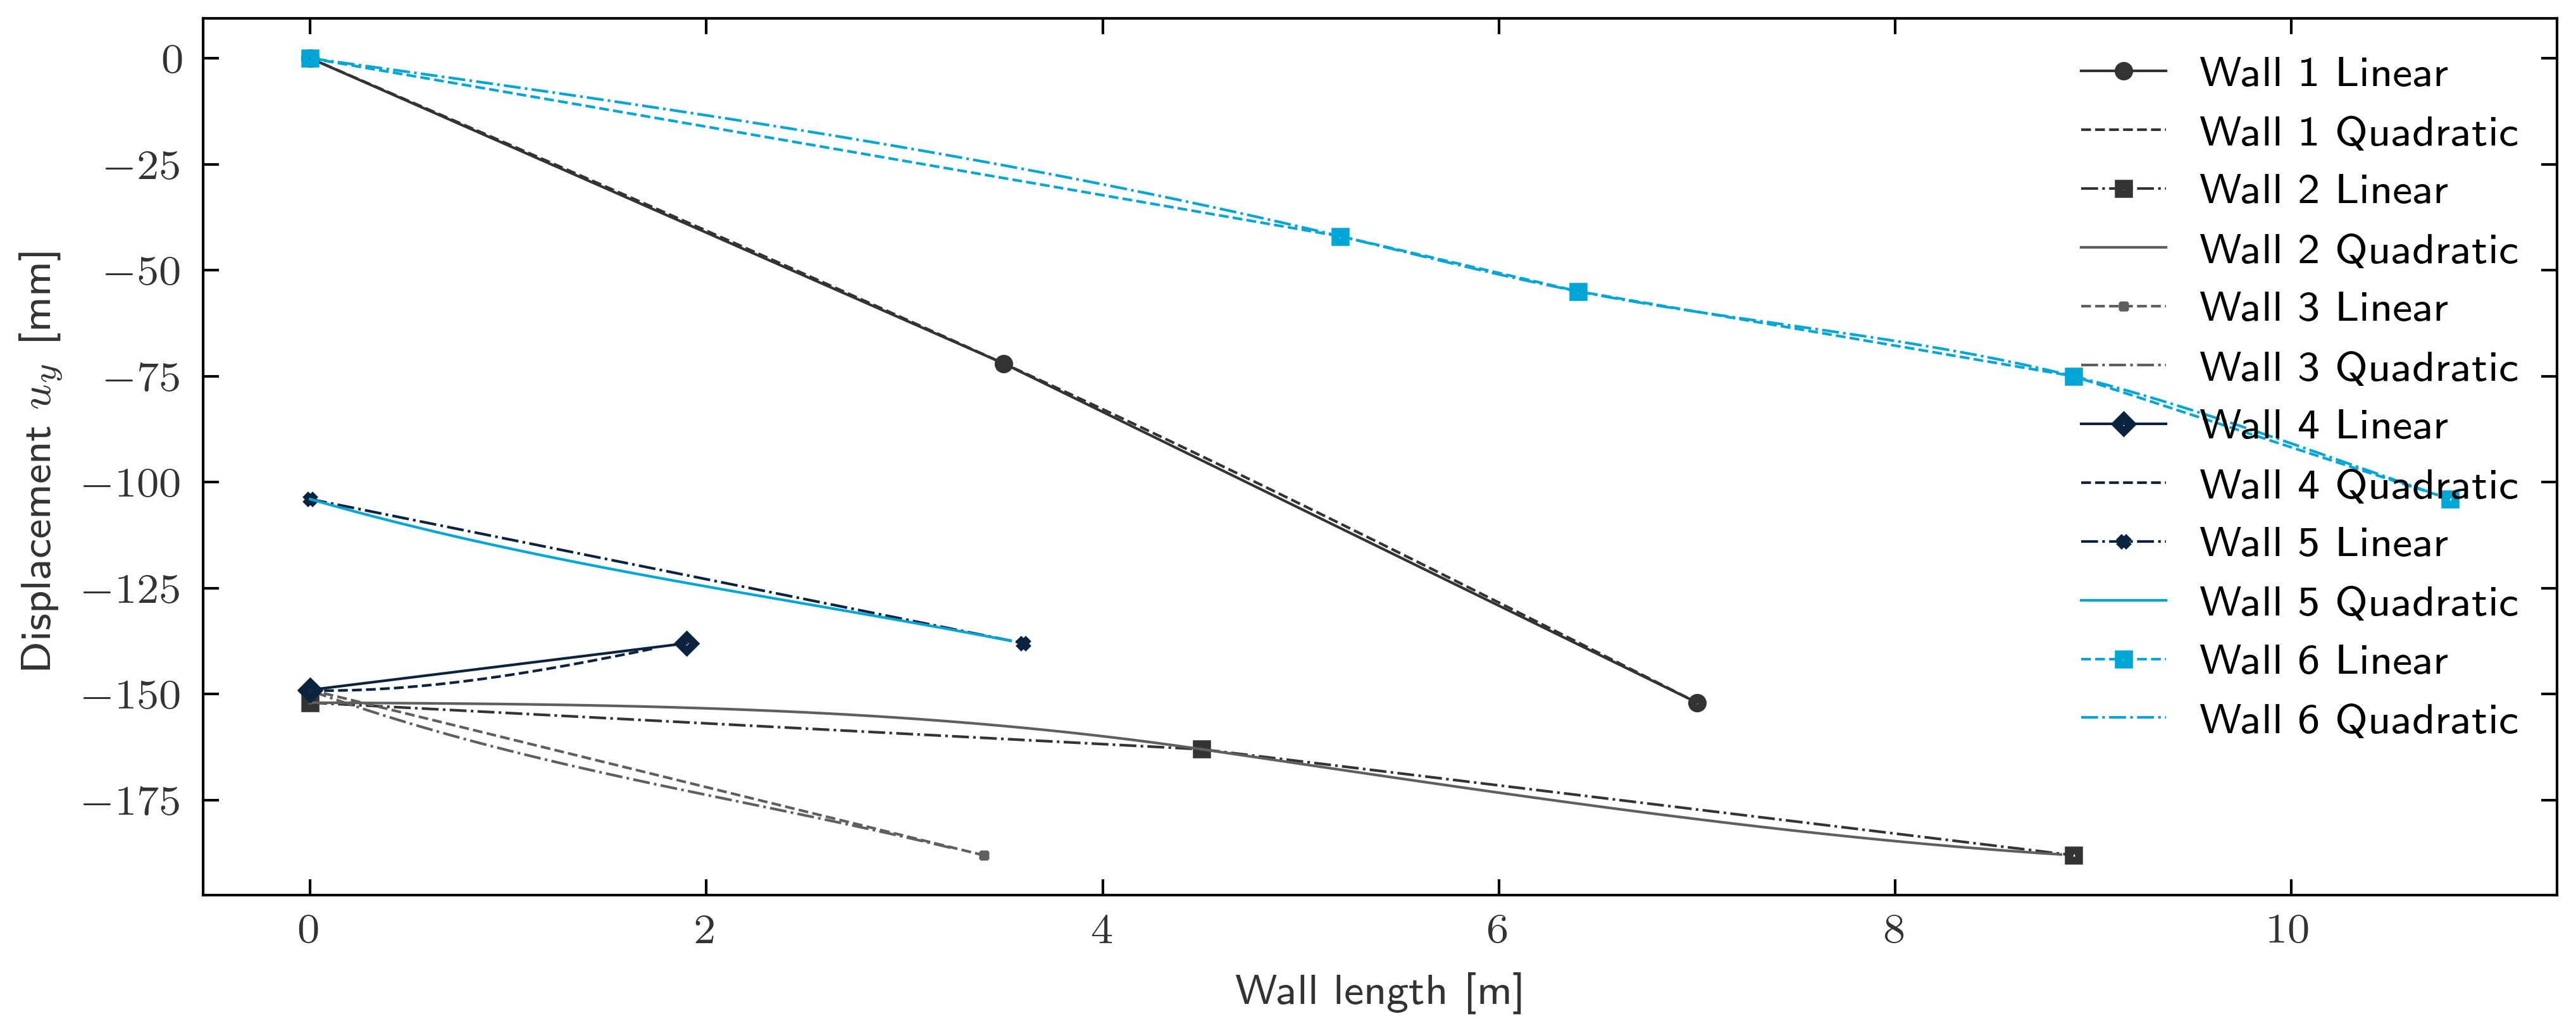

In [ ]:
from fea.plots import style
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter 

markers = ['o', 's', '+', 'D', 'x', 's']
process = ijsselsteinseweg.process
fig, ax = plt.subplots(figsize=(8, 3))

for i, wall in enumerate(ijsselsteinseweg.house):    
    if i % 2 == 0:
        x = walls[wall]['y'] - walls[wall]['y'].min()
        line, = ax.plot(x, 
                        walls[wall]['z'], 
                        label=f'Wall {i+1} Linear', 
                        linewidth=0.5, 
                        marker=markers[i], 
                        markerfacecolor='none', 
                        markeredgewidth=0.5)
    else:
        x = walls[wall]['x'] - walls[wall]['x'].min()
        line, = ax.plot(x, 
                        walls[wall]['z'], 
                        label=f'Wall {i+1} Linear', 
                        linewidth=0.5, 
                        marker=markers[i], 
                        markerfacecolor='none', 
                        markeredgewidth=0.5)
    
    # Get the color of the line and set it as the marker edge color
    color = line.get_color()
    line.set_markeredgecolor(color)
    line.set_markeredgewidth(1.5)  # Adjust the marker edge width as needed

    # Plot the quadratic line
    ax.plot(process['int'][wall]['ax_rel'], 
            process['int'][wall]['z_q'], 
            label=f'Wall {i+1} Quadratic', 
            linewidth=0.5)

ax.set_xlabel('Wall length [m]')
ax.set_ylabel('Displacement $u_y$ [mm]')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # Use scientific notation if needed
ax.legend(loc='best')
plt.show()
